#**6431309721 Chanagun Viriysathapornpong**

In [414]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn import set_config
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
import mlflow
import mlflow.sklearn
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings("ignore")

In [415]:
!pip install mlflow --quiet --use-deprecated=legacy-resolver

#1. Load "ModifiedEdibleMushroom.csv" data from the link below (note: this data set has been preliminarily prepared.).

In [416]:
df = pd.read_csv('https://raw.githubusercontent.com/pvateekul/2110446_DSDE_2023s2/main/code/Week03_ML/mushroom2020_dataset.csv') #read file
df.head() #top 5 row of data

,id,label,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,stalk-shape,...,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate,gill-color-rate,veil-color-rate,stalk-color-above-ring-rate,stalk-color-below-ring-rate
0,1,p,x,s,t,p,f,c,n,e,...,o,p,k,s,u,1.0,3.0,1.0,1.0,1.0
1,2,e,x,s,t,a,f,c,b,e,...,o,p,n,n,g,2.0,3.0,1.0,1.0,1.0
2,3,e,b,s,t,l,f,c,b,e,...,o,p,n,n,m,3.0,1.0,1.0,1.0,1.0
3,4,p,x,y,t,p,f,c,n,e,...,o,p,k,s,u,3.0,1.0,1.0,1.0,1.0
4,5,e,x,s,f,n,f,w,b,t,...,o,e,n,a,g,4.0,3.0,1.0,1.0,1.0


In [417]:
df.info() #info of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           5824 non-null   int64  
 1   label                        5764 non-null   object 
 2   cap-shape                    5824 non-null   object 
 3   cap-surface                  5797 non-null   object 
 4   bruises                      5725 non-null   object 
 5   odor                         5725 non-null   object 
 6   gill-attachment              5725 non-null   object 
 7   gill-spacing                 5694 non-null   object 
 8   gill-size                    5703 non-null   object 
 9   stalk-shape                  5703 non-null   object 
 10  stalk-root                   5793 non-null   object 
 11  stalk-surface-above-ring     5793 non-null   object 
 12  stalk-surface-below-ring     5793 non-null   object 
 13  veil-type         

In [418]:
df.shape #number of row and column

(5824, 24)

#2. Drop rows where the target (label) variable is missing.

In [419]:
df = df.dropna(subset='label') #drop row that label is null

#3. Drop the following variables:

```
'id','gill-attachment', 'gill-spacing', 'gill-size','gill-color-rate','stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring-rate','stalk-color-below-ring-rate','veil-color-rate','veil-type'
```






In [420]:
df = df.drop(['id','gill-attachment', 'gill-spacing', 'gill-size','gill-color-rate', #drop all of this column
'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring-rate','stalk-color-below-ring-rate','veil-color-rate','veil-type'], axis=1)
df.shape[1] #number of column

12

In [421]:
df.head() #top 5 row of data

,label,cap-shape,cap-surface,bruises,odor,stalk-shape,ring-number,ring-type,spore-print-color,population,habitat,cap-color-rate
0,p,x,s,t,p,e,o,p,k,s,u,1.0
1,e,x,s,t,a,e,o,p,n,n,g,2.0
2,e,b,s,t,l,e,o,p,n,n,m,3.0
3,p,x,y,t,p,e,o,p,k,s,u,3.0
4,e,x,s,f,n,t,o,e,n,a,g,4.0


#6. Convert the label variable e (edible) to 1 and p (poisonous) to 0 and check the quantity. class0: class1

In [422]:
df['label'].replace({'p': 0, 'e': 1}, inplace=True) #replace p with 0 and e with 1
df['label'] = df['label'].astype(int) #convert type label to int

In [423]:
df.info() #info of each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5764 entries, 0 to 5823
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   label              5764 non-null   int64  
 1   cap-shape          5764 non-null   object 
 2   cap-surface        5737 non-null   object 
 3   bruises            5665 non-null   object 
 4   odor               5665 non-null   object 
 5   stalk-shape        5643 non-null   object 
 6   ring-number        5702 non-null   object 
 7   ring-type          5702 non-null   object 
 8   spore-print-color  5708 non-null   object 
 9   population         5708 non-null   object 
 10  habitat            5733 non-null   object 
 11  cap-color-rate     5737 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 585.4+ KB


# Create Pipelines for Numerical and Categorical Features
*  SimpleImputer to fill in the missing values.

*  StandardScaler to scale the value to range from 0 to 1.

*  OneHotEncoder to split to many numerical columns for model training.

In [424]:
df.columns #show cloumn of data

Index(['label', 'cap-shape', 'cap-surface', 'bruises', 'odor', 'stalk-shape',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat', 'cap-color-rate'],
      dtype='object')

In [425]:
#assume numerical and categorical columns
num_cols = ['cap-color-rate']
cat_cols = ['cap-shape', 'cap-surface', 'bruises', 'odor', 'stalk-shape',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat']

#define the preprocessing steps
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore', sparse=False))])

#combine preprocessing steps
col_trans = ColumnTransformer(transformers=[
    ('num_pipeline', num_pipeline, ['cap-color-rate']),
    ('cat_pipeline', cat_pipeline, ['cap-shape', 'cap-surface', 'bruises', 'odor', 'stalk-shape',
       'ring-number', 'ring-type', 'spore-print-color', 'population',
       'habitat'])
], n_jobs=-1)

In [426]:
#add model to final pipeline
model_pipeline = Pipeline(steps =[
    ('col_trans', col_trans),
    ('model', RandomForestClassifier(random_state=2020))
])

In [427]:
set_config(display='diagram') #display configuration for scikit-learn's pipeline diagrams.
display(model_pipeline) #display pipeline model

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['cap-color-rate']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['cap-shape', 'cap-surface',
                                                   'bruises', 'odor',
                                                   'stalk-shape', 'ring-number',
                                                   'ring-type',
                                                   'spore-print-color',
                                                   'population',
                                                   'habitat'])])),
                ('model', RandomForestClassifier(random_state=2020))])

#8. Split train/test with 20% test, stratify, and seed = 2020.


In [428]:
# extract features and target variable
X = df[num_cols + cat_cols]
y = df['label']

#perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2020)

In [429]:
model_pipeline.fit(X_train, y_train) #fit the model pipeline on the training data
y_pred = model_pipeline.predict(X_test) #predict labels for the test data
print(classification_report(y_test, y_pred, target_names=['Poisonous', 'Edible'], digits=4)) #print classification report

              precision    recall  f1-score   support

   Poisonous     1.0000    1.0000    1.0000       732
      Edible     1.0000    1.0000    1.0000       421

    accuracy                         1.0000      1153
   macro avg     1.0000    1.0000    1.0000      1153
weighted avg     1.0000    1.0000    1.0000      1153



# GridSearchCV

In [430]:
model_pipeline.get_params() #retrieves the parameters of the machine learning model pipeline.

{'memory': None,
 'steps': [('col_trans', ColumnTransformer(n_jobs=-1,
                     transformers=[('num_pipeline',
                                    Pipeline(steps=[('impute', SimpleImputer()),
                                                    ('scale', StandardScaler())]),
                                    ['cap-color-rate']),
                                   ('cat_pipeline',
                                    Pipeline(steps=[('impute',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('one-hot',
                                                     OneHotEncoder(handle_unknown='ignore',
                                                                   sparse=False))]),
                                    ['cap-shape', 'cap-surface', 'bruises', 'odor',
                                     'stalk-shape', 'ring-number', 'ring-type',
                                     'spo

In [431]:
# Define the parameter grid for grid search
param_grid = {
    'model__n_estimators': [100, 200],
    'model__min_samples_leaf': [2, 5, 10],
    'model__max_depth': [2, 3, 6],
    'model__criterion': ['gini', 'entropy']
}

# Create and fit the grid search pipeline
gs_pipeline = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=StratifiedKFold(n_splits=5),
    scoring='accuracy'
)
gs_pipeline.fit(X_train, y_train)

# Print the best parameter set found by grid search
print("Best parameter set: " + str(gs_pipeline.best_params_))

Best parameter set: {'model__criterion': 'gini', 'model__max_depth': 6, 'model__min_samples_leaf': 2, 'model__n_estimators': 200}


In [432]:
def plot_conf_matrix(y_test, y_pred): #define a function to plot the confusion matrix
    conf = confusion_matrix(y_test, y_pred)  #calculate the confusion matrix
    ax = sns.heatmap(conf, annot=True, cmap='Blues')  #create heatmap of confusion matrix

    #plot heatmap
    ax.set_title('Confusion Matrix')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values');
    ax.xaxis.set_ticklabels(['Poisonous', 'Edible'])
    ax.yaxis.set_ticklabels(['Poisonous', 'Edible'])
    plt.show()

              precision    recall  f1-score   support

   Poisonous     1.0000    0.9986    0.9993       732
      Edible     0.9976    1.0000    0.9988       421

    accuracy                         0.9991      1153
   macro avg     0.9988    0.9993    0.9991      1153
weighted avg     0.9991    0.9991    0.9991      1153



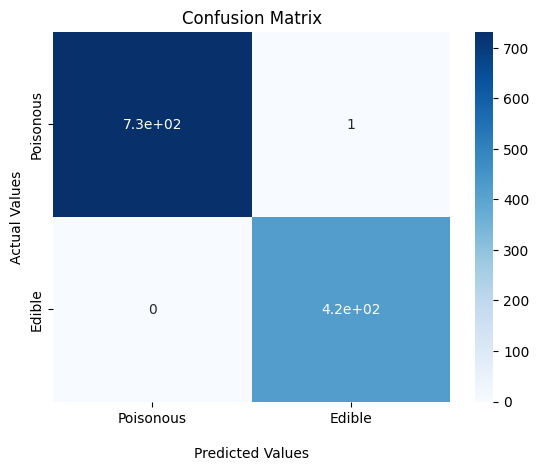

In [433]:
y_pred_gs = gs_pipeline.predict(X_test) #predict labels by grid search pipeline
print(classification_report(y_test, y_pred_gs, target_names=['Poisonous', 'Edible'], digits=4)) #print the classification report
plot_conf_matrix(y_test, y_pred_gs) #plot the confusion matrix function

# MLflow + Model Pipeline

In [434]:
local_registry = "sqlite:///mlruns.db" #define URI for local MLflow
mlflow.set_tracking_uri(local_registry) #set MLflow tracking URI for point to the local_registry
experiment_id = mlflow.set_experiment('test_experiment') #set the active MLflow experiment to 'test_experiment'

In [435]:
#calculates the accuracy score between the actual and predicted values
def eval_metrics(actual, pred):
    accuracy = accuracy_score(actual, pred)
    return accuracy


def train_model(criterion, max_depth, min_samples_leaf, n_estimators):
    with mlflow.start_run():
        #create a random forest classifier model
        model = RandomForestClassifier(criterion=criterion, max_depth=max_depth,min_samples_leaf=min_samples_leaf, n_estimators=n_estimators,random_state=2020)
        #create pipeline
        model_pipeline = Pipeline(steps=[
                        ('col_trans', col_trans),
                        ('model', model)
                        ])

        model_pipeline.fit(X_train, y_train)   #train model pipeline on traning data
        y_pred = model_pipeline.predict(X_test)  #predict label for testing data
        (accuracy) = eval_metrics(y_test, y_pred) #calculate accuracy of predictions

        print('Random Forest (criterion=%s, max_depth=%d, min_samples_leaf=%d, n_estimators=%d):'%(criterion, max_depth, min_samples_leaf, n_estimators))
        print('Accuracy: {:.4f}'.format(accuracy))
        #log the model hyperparameters
        mlflow.log_param("criterion", criterion)
        mlflow.log_param("max_depth", max_depth)
        mlflow.log_param("min_samples_leaf", min_samples_leaf)
        mlflow.log_param("n_estimators", n_estimators)
        mlflow.log_metric("accuracy", accuracy_score(y_test, y_pred)) #log the accuracy metric
        mlflow.sklearn.log_model(model_pipeline, 'model_pipeline') #log the trained model pipeline

        return model_pipeline

In [436]:
#fefine the list of parameter
param_combinations = [
    ('gini', 2, 2, 100),
    ('entropy', 2, 2, 100),
    ('gini', 3, 2, 100),
    ('entropy', 3, 2, 100),
    ('gini', 6, 2, 100),
    ('entropy', 6, 2, 200),
    ('gini', 2, 5, 200),
    ('entropy', 2, 5, 200),
    ('gini', 3, 5, 200),
    ('gini', 3, 5, 200)
]

#loop train the model
for params in param_combinations:
    train_model(*params)

Random Forest (criterion=gini, max_depth=2, min_samples_leaf=2, n_estimators=100):
Accuracy: 0.9696
Random Forest (criterion=entropy, max_depth=2, min_samples_leaf=2, n_estimators=100):
Accuracy: 0.9679
Random Forest (criterion=gini, max_depth=3, min_samples_leaf=2, n_estimators=100):
Accuracy: 0.9748
Random Forest (criterion=entropy, max_depth=3, min_samples_leaf=2, n_estimators=100):
Accuracy: 0.9766
Random Forest (criterion=gini, max_depth=6, min_samples_leaf=2, n_estimators=100):
Accuracy: 0.9991
Random Forest (criterion=entropy, max_depth=6, min_samples_leaf=2, n_estimators=200):
Accuracy: 0.9991
Random Forest (criterion=gini, max_depth=2, min_samples_leaf=5, n_estimators=200):
Accuracy: 0.9705
Random Forest (criterion=entropy, max_depth=2, min_samples_leaf=5, n_estimators=200):
Accuracy: 0.9670
Random Forest (criterion=gini, max_depth=3, min_samples_leaf=5, n_estimators=200):
Accuracy: 0.9757
Random Forest (criterion=gini, max_depth=3, min_samples_leaf=5, n_estimators=200):
Accur

In [437]:
best_run_df = mlflow.search_runs(order_by=['metrics.accuracy DESC'], max_results=5) #search for best 5 runs data
best_run_df #display the best runs data

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.accuracy,params.n_estimators,params.criterion,params.max_depth,params.min_samples_leaf,tags.mlflow.runName,tags.mlflow.log-model.history,tags.mlflow.source.type,tags.mlflow.source.name,tags.mlflow.user
0,bab2000445ac43a093e2f2792b7db4e7,1,FINISHED,/content/mlruns/1/bab2000445ac43a093e2f2792b7d...,2024-02-12 09:21:53.696000+00:00,2024-02-12 09:21:58.080000+00:00,0.999133,200,entropy,6,2,capable-fawn-479,"[{""run_id"": ""bab2000445ac43a093e2f2792b7db4e7""...",LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,root
1,2dcc6ea26ae04b90b7ac49117f5a8366,1,FINISHED,/content/mlruns/1/2dcc6ea26ae04b90b7ac49117f5a...,2024-02-12 09:21:50.246000+00:00,2024-02-12 09:21:53.678000+00:00,0.999133,100,gini,6,2,lyrical-squid-200,"[{""run_id"": ""2dcc6ea26ae04b90b7ac49117f5a8366""...",LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,root
2,8734cb97c4c14f988af9cecbd676f308,1,FINISHED,/content/mlruns/1/8734cb97c4c14f988af9cecbd676...,2024-02-12 09:15:45.220000+00:00,2024-02-12 09:15:48.207000+00:00,0.999133,200,entropy,6,2,useful-snail-121,"[{""run_id"": ""8734cb97c4c14f988af9cecbd676f308""...",LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,root
3,0488d9dd132b428bb3caed6c03a219bb,1,FINISHED,/content/mlruns/1/0488d9dd132b428bb3caed6c03a2...,2024-02-12 09:15:42.424000+00:00,2024-02-12 09:15:45.140000+00:00,0.999133,100,gini,6,2,flawless-kit-369,"[{""run_id"": ""0488d9dd132b428bb3caed6c03a219bb""...",LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,root
4,7f5778eb349e413f8f096340a0200a70,1,FINISHED,/content/mlruns/1/7f5778eb349e413f8f096340a020...,2024-02-12 09:06:06.810000+00:00,2024-02-12 09:06:12.375000+00:00,0.999133,200,entropy,6,2,gentle-vole-3,"[{""run_id"": ""7f5778eb349e413f8f096340a0200a70""...",LOCAL,/usr/local/lib/python3.10/dist-packages/colab_...,root


In [442]:
run_id = str(best_run_df.loc[0, 'run_id']) #convert best runs into string
print('run_id: ', run_id) #show run id

#build the model URI using the run_id
run_id = str(best_run_df.loc[0, 'run_id'])
model_uri = f"runs:/{run_id}/model"

print('model_uri: ', model_uri) #show model URI

run_id:  bab2000445ac43a093e2f2792b7db4e7
model_uri:  runs:/bab2000445ac43a093e2f2792b7db4e7/model


In [439]:
loaded_model = mlflow.pyfunc.load_model(model_uri=f"runs:/{run_id}/model_pipeline") #load the trained model from the specified model
predicted = loaded_model.predict(pd.DataFrame(X_test)) #loaded model to make predictions on the test data
print(classification_report(y_test, predicted, target_names=['Edible', 'Poisonous'], digits=4)) #print a classification report

              precision    recall  f1-score   support

      Edible     1.0000    0.9986    0.9993       732
   Poisonous     0.9976    1.0000    0.9988       421

    accuracy                         0.9991      1153
   macro avg     0.9988    0.9993    0.9991      1153
weighted avg     0.9991    0.9991    0.9991      1153

